# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url="https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html=browser.html
soup=soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table=soup.find('table', class_='table')
rows=table.find_all('tr')
rows

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
mars_data=[]

# Loop through the scraped data to create a list of rows
for row in rows:
    data=row.find_all('td')
    data_cleaned=[x.text.strip() for x in data]
    mars_data.append(data_cleaned)
mars_data

[[],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-7

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df=pd.DataFrame(mars_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [9]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [10]:
#Dropping Null Value Row at the top
mars_df=mars_df.dropna()
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [14]:
# Change data types for data analysis

#Changing the data types from string to int or float
mars_df=mars_df.astype({'id':'int32', 'sol':'int32', 'ls':'int32', "month":'int32', 'min_temp':'float32', 'pressure':'float32'})

#Changing date string to datetime
mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])


In [15]:
# Confirm type changes were successful by examining data types again
(mars_df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float32
pressure                   float32
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [209]:
# 1. How many months are there on Mars?

#Determine number of months by calculating max value in month column
total_months=mars_df['month'].max()

#Printing the result
print(f'''There are a total of {total_months} months on Mars''')

There are a total of 12 months on Mars


In [17]:
# 2. How many Martian days' worth of data are there?

#Subtracting the max value of sols with the min value to determine the total number available in dataset
total_days=mars_df['sol'].max()-mars_df['sol'].min()

#Printing the result
print(f'''There are a total of {total_days} Martian days worth of data''')

There are a total of 1967 Martian days worth of data


In [18]:
# 3. What is the average low temperature by month?

#Using groupby method
avg_low_temp=mars_df.groupby('month')['min_temp'].mean()

avg_low_temp

month
1    -77.160919
2    -79.932587
3    -83.307289
4    -82.747421
5    -79.308723
6    -75.299316
7    -72.281693
8    -68.382980
9    -69.171638
10   -71.982140
11   -71.985504
12   -74.451805
Name: min_temp, dtype: float32

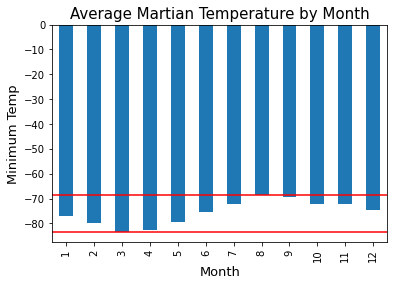

In [42]:
#Determine lowest and highest temps to set horizontal line for easier visualization
warmest_month=avg_low_temp.max()
coldest_month=avg_low_temp.min()

# Plot the average temperature by month
avg_low_temp.plot.bar()

plt.xlabel('Month', size=13)
plt.ylabel('Minimum Temp', size=13)
plt.title("Average Martian Temperature by Month", size =15)

#Setting horizontal lines at coldest and hottest months
plt.axhline(y=warmest_month, color='r')
plt.axhline(y=coldest_month, color='r')

In [28]:
# Identify the coldest and hottest months in Curiosity's location

print(f'''The warmest month at Curiosity's location is 8, with an average temperature of {warmest_month} degrees Celcius 
whereas the coldest is 3, with an average temperature of {coldest_month} degrees Celcius''')

The warmest month at Curiosity's location is 8, with an average temperature of -68.38298034667969 degrees Celcius 
whereas the coldest is 3, with an average temperature of -83.30728912353516 degrees Celcius


In [49]:
# 4. Average pressure by Martian month using groupby function
avg_pressure=mars_df.groupby('month')['pressure'].mean()

avg_pressure

month
1     862.488525
2     889.455078
3     877.322937
4     806.329895
5     748.557068
6     745.054443
7     795.105652
8     873.829773
9     913.305969
10    887.312500
11    857.014465
12    842.156616
Name: pressure, dtype: float32

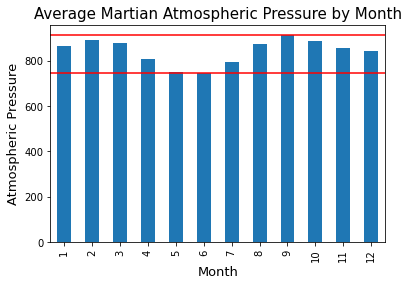

In [50]:
#Determine lowest and highest pressure to set horizontal line for easier visualization
highest_pressure_month=avg_pressure.max()
lowest_pressure_month=avg_pressure.min()

# Plot the average pressure by month
avg_pressure.plot.bar()

plt.xlabel('Month', size=13)
plt.ylabel('Atmospheric Pressure', size=13)
plt.title("Average Martian Atmospheric Pressure by Month", size =15)

#Setting horizontal lines at highest and lowest pressure months
plt.axhline(y=highest_pressure_month, color='r')
plt.axhline(y=lowest_pressure_month, color='r')

In [51]:
# Identify the months with the lowest and highest atmospheric pressure on Mars

print(f'''The month with the lowest atmostpheric pressure is 6, with an average pressure of {lowest_pressure_month} 
whereas the highest is 9, with an average pressure of {highest_pressure_month} ''')

The month with the lowest atmostpheric pressure is 6, with an average pressure of 745.054443359375 
whereas the highest is 9, with an average pressure of 913.3059692382812 


In [52]:
# 5. How many terrestrial (earth) days are there in a Martian year?

#5.1 Using an arithmetic approach by finding the beginning of a Martian New Year by the Solar longitude
# (LS=Min) and the end (LS= MAX)

#Finding the Martian New Year

beginning_of_martian_year=mars_df['ls'].min()
beginning_of_martian_year

0

In [54]:
# Finding its equivalent in terrestrial dates

new_year_terrestrial_dates=mars_df.query('ls == 0')['terrestrial_date']

new_year_terrestrial_dates

#We can see that the Martian New Year starts at index 305/306, 926/927 & 1580/1581. Martian days are longer than Earth days,
#so it makes sense that LS carries over more than one day. I'll use index 305 as the beginning of a new year for my
#calculation

305    2013-08-01
306    2013-08-02
926    2015-06-19
927    2015-06-20
1580   2017-05-06
1581   2017-05-07
Name: terrestrial_date, dtype: datetime64[ns]

In [55]:
#Finding the end of the Martian year in LS using the max function

end_of_martian_year=mars_df['ls'].max()
end_of_martian_year

359

In [57]:
#Finding the terrestrial date equivalent

end_of_year_terrestrial_dates=mars_df.query('ls== 359')['terrestrial_date']
end_of_year_terrestrial_dates

#We can see that the Martian New Year ends at index 303/304, 924/925 & 1578/1579. Since I used index 305 as the beginning
#of the year, index 925 is the logical end of the same year to be used for my calculation

303    2013-07-30
304    2013-07-31
924    2015-06-17
925    2015-06-18
1578   2017-05-04
1579   2017-05-05
Name: terrestrial_date, dtype: datetime64[ns]

In [63]:
#Taking the end of one year (index 925) and calculating the delta from the beginning of the last year (index 305)

from datetime import date

earth_days=(date(2015,6,18)-date(2013,8,1)).days

print(f''' There are approximately {earth_days} terrestrial days in a Martian year using solar longitude as the benchmark metric''')

 There are approximately 686 terrestrial days in a Martian year using solar longitude as the benchmark metric


We know temperatures tend to follow annual patterns. The peaks in temperatures are around day 1375 and 725 in the chart      below. 1375-725=650. Therefore 650 days is approximately the number of terrestrial days in a Martian year using a visual      estimate


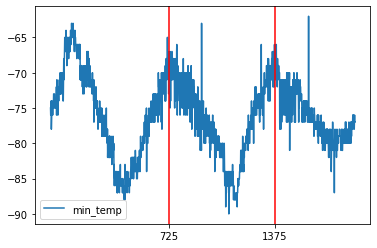

In [64]:
#5.2 Using a visual approach by plotting yearly temperature

#Plotting Temperatures
ax=mars_df[["min_temp"]].plot()

#Setting vertical lines to help visualize the peaks of temperatures pointing to annual patterns
ax.set(xticks=[725,1375])
plt.axvline(x=725, color='r')
plt.axvline(x=1375, color='r')

print('We know temperatures tend to follow annual patterns. The peaks in temperatures are around day 1375 and 725 in the chart\
      below. 1375-725=650. Therefore 650 days is approximately the number of terrestrial days in a Martian year using a visual\
      estimate')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [65]:
# Write the data to a CSV
mars_df.to_csv('mars_temperature_data.csv')

In [66]:
browser.quit()